In [3]:
import pandas as pd

df = pd.read_csv("temperature.csv")

print("Aperçu du dataset :")
print(df.head())

# Vérification des valeurs manquantes
print("\nValeurs manquantes par colonne :")
print(df.isnull().sum())

# Suppression des lignes avec trop de valeurs manquantes
df.dropna(subset=["Avg_Temperature_degC", "CO2_Emissions_tons_per_capita", "Sea_Level_Rise_mm"], inplace=True)

# Supprimer les doublons
df.drop_duplicates(inplace=True)

# 📊 S'assurer que les types sont corrects
df["Year"] = df["Year"].astype(int)
df["Avg_Temperature_degC"] = df["Avg_Temperature_degC"].astype(float)
df["CO2_Emissions_tons_per_capita"] = df["CO2_Emissions_tons_per_capita"].astype(float)
df["Sea_Level_Rise_mm"] = df["Sea_Level_Rise_mm"].astype(float)
df["Rainfall_mm"] = df["Rainfall_mm"].astype(float)
df["Population"] = df["Population"].astype(int)
df["Renewable_Energy_pct"] = df["Renewable_Energy_pct"].astype(float)
df["Extreme_Weather_Events"] = df["Extreme_Weather_Events"].astype(int)
df["Forest_Area_pct"] = df["Forest_Area_pct"].astype(float)

# (Optionnel) Ajouter des groupes par décennies
df["Decade"] = (df["Year"] // 10) * 10

# (Optionnel) Ajouter une colonne continent si besoin (à partir d'un mapping manuel)
# continents = {
#     'France': 'Europe', 'United States': 'North America', ... etc.
# }
# df["Continent"] = df["Country"].map(continents)




Aperçu du dataset :
   Year    Country  Avg_Temperature_degC  CO2_Emissions_tons_per_capita  \
0  2006         UK                   8.9                            9.3   
1  2019        USA                  31.0                            4.8   
2  2014     France                  33.9                            2.8   
3  2010  Argentina                   5.9                            1.8   
4  2007    Germany                  26.9                            5.6   

   Sea_Level_Rise_mm  Rainfall_mm  Population  Renewable_Energy_pct  \
0                3.1         1441   530911230                  20.4   
1                4.2         2407   107364344                  49.2   
2                2.2         1241   441101758                  33.3   
3                3.2         1892  1069669579                  23.7   
4                2.4         1743   124079175                  12.5   

   Extreme_Weather_Events  Forest_Area_pct  
0                      14             59.8  
1           

Colonnes du dataset : Index(['Year', 'Country', 'Avg_Temperature_degC',
       'CO2_Emissions_tons_per_capita', 'Sea_Level_Rise_mm', 'Rainfall_mm',
       'Population', 'Renewable_Energy_pct', 'Extreme_Weather_Events',
       'Forest_Area_pct', 'Decade'],
      dtype='object')
Années couvertes : 2000 - 2023


C:\Users\carol\AppData\Local\Temp\ipykernel_32476\3391986812.py:23: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\carol\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


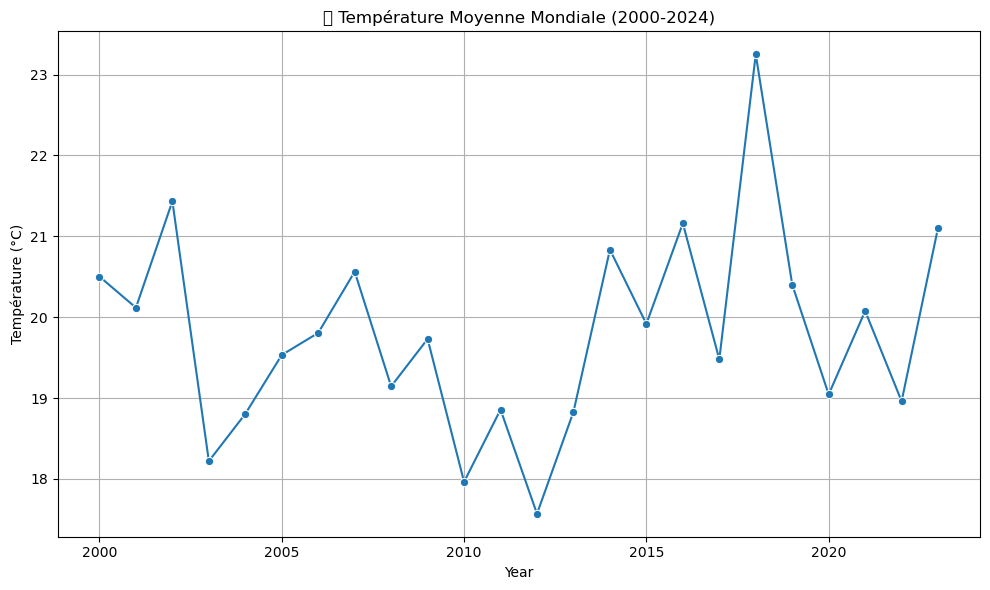

C:\Users\carol\AppData\Local\Temp\ipykernel_32476\3391986812.py:35: UserWarning: Glyph 128168 (\N{DASH SYMBOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\carol\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128168 (\N{DASH SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


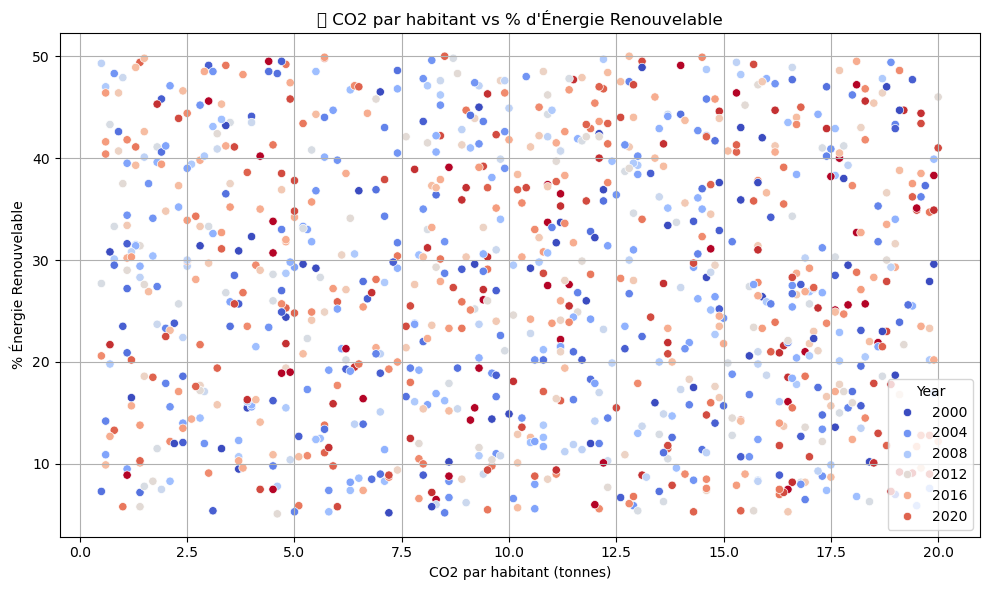

C:\Users\carol\AppData\Local\Temp\ipykernel_32476\3391986812.py:47: UserWarning: Glyph 127786 (\N{CLOUD WITH TORNADO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\carol\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127786 (\N{CLOUD WITH TORNADO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


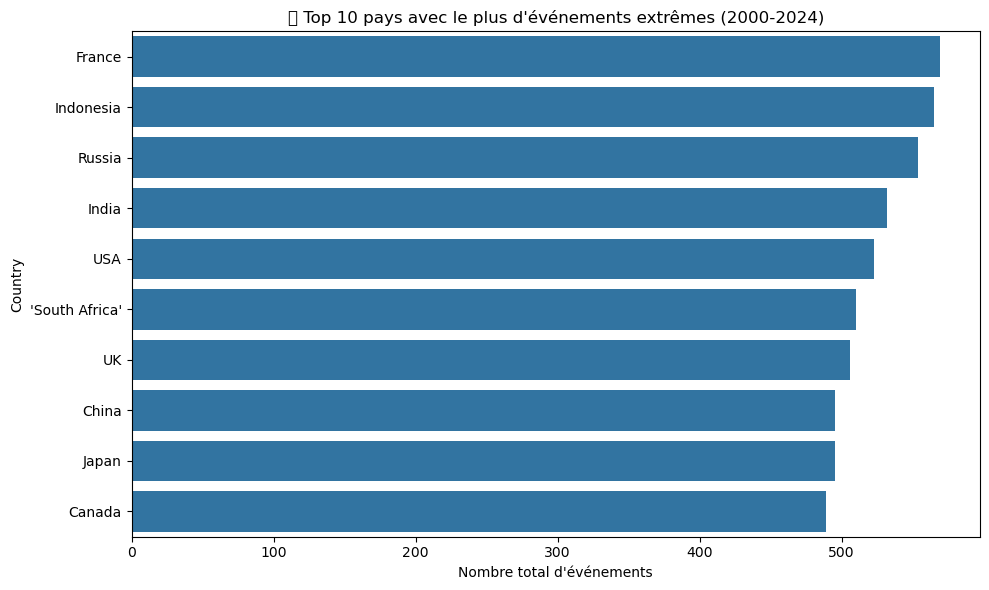

C:\Users\carol\AppData\Local\Temp\ipykernel_32476\3391986812.py:59: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\carol\AppData\Local\Temp\ipykernel_32476\3391986812.py:59: UserWarning: Glyph 127794 (\N{EVERGREEN TREE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\carol\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\carol\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127794 (\N{EVERGREEN TREE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


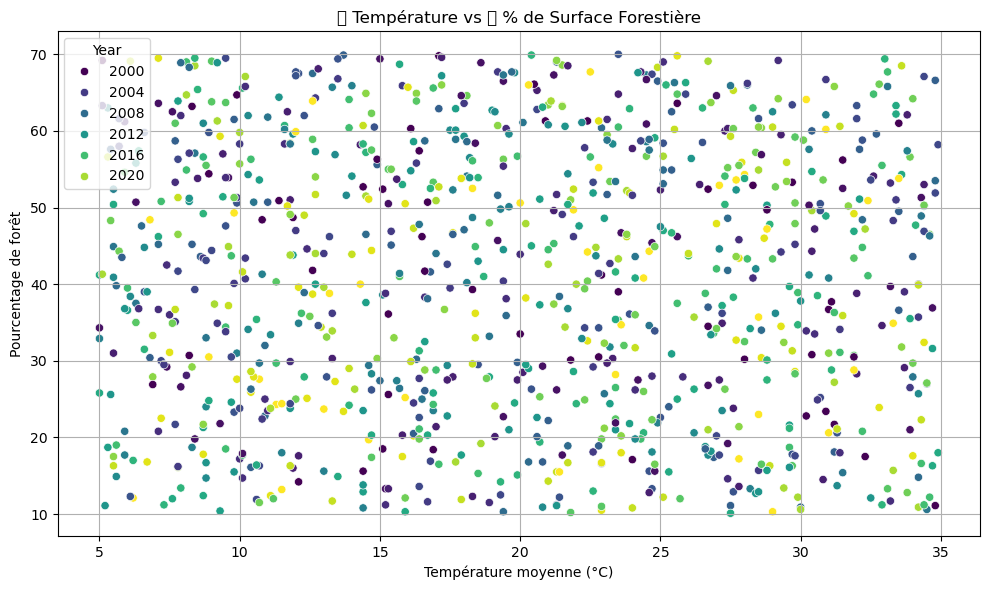

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Vérification rapide
print("Colonnes du dataset :", df.columns)
print("Années couvertes :", df['Year'].min(), "-", df['Year'].max())

# Convertir les types si nécessaire
df["Year"] = df["Year"].astype(int)
df["Population"] = df["Population"].astype(int)
df["Extreme_Weather_Events"] = df["Extreme_Weather_Events"].astype(int)

# ------------------------------------------
# 🎯 Visualisation 1 : Évolution température moyenne mondiale
# ------------------------------------------
temp_yearly = df.groupby("Year")["Avg_Temperature_degC"].mean().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(data=temp_yearly, x="Year", y="Avg_Temperature_degC", marker="o")
plt.title("🌡️ Température Moyenne Mondiale (2000-2024)")
plt.ylabel("Température (°C)")
plt.grid(True)
plt.tight_layout()
plt.show()

# ------------------------------------------
# 🎯 Visualisation 2 : CO2 vs Énergies Renouvelables (corrélation)
# ------------------------------------------
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="CO2_Emissions_tons_per_capita", y="Renewable_Energy_pct", hue="Year", palette="coolwarm")
plt.title("💨 CO2 par habitant vs % d'Énergie Renouvelable")
plt.xlabel("CO2 par habitant (tonnes)")
plt.ylabel("% Énergie Renouvelable")
plt.grid(True)
plt.tight_layout()
plt.show()

# ------------------------------------------
# 🎯 Visualisation 3 : Top 10 pays avec le plus d'événements climatiques extrêmes
# ------------------------------------------
top_extreme = df.groupby("Country")["Extreme_Weather_Events"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_extreme.values, y=top_extreme.index)
plt.title("Top 10 pays avec le plus d'événements extrêmes (2000-2024)")
plt.xlabel("Nombre total d'événements")
plt.tight_layout()
plt.show()

# ------------------------------------------
# 🎯 Visualisation 4 : Température vs Forêts (relation)
# ------------------------------------------
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="Avg_Temperature_degC", y="Forest_Area_pct", hue="Year", palette="viridis")
plt.title("Température vs % de Surface Forestière")
plt.xlabel("Température moyenne (°C)")
plt.ylabel("Pourcentage de forêt")
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\carol\AppData\Local\Temp\ipykernel_32476\1250943523.py:20: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\carol\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


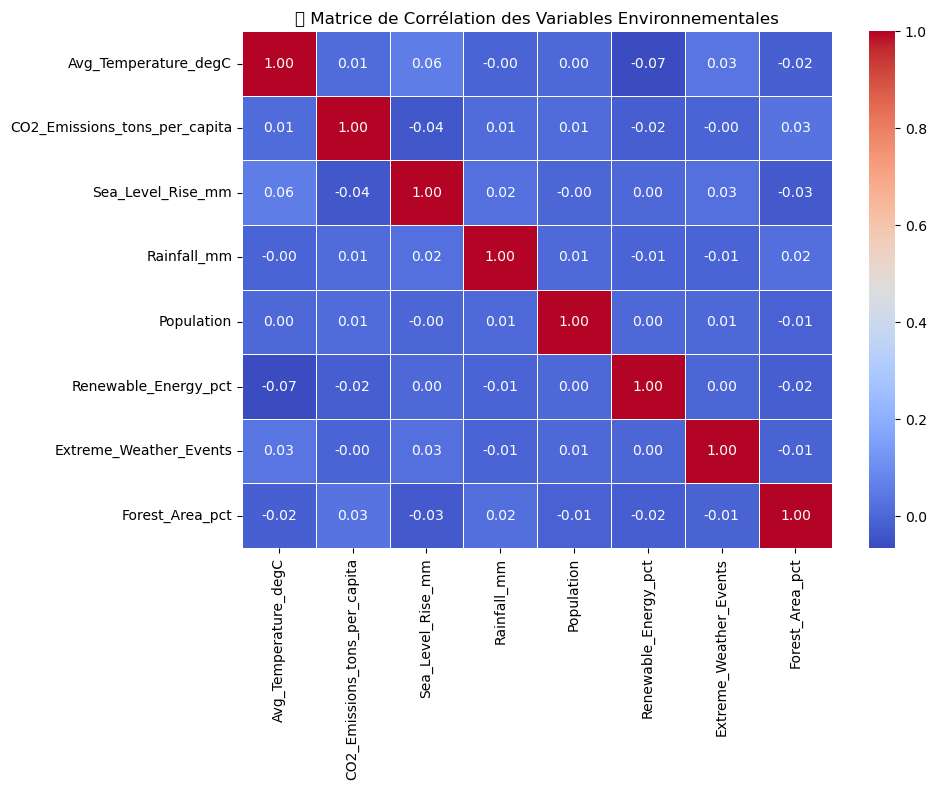

In [7]:
# Sélection des colonnes numériques pour la corrélation
num_cols = [
    "Avg_Temperature_degC",
    "CO2_Emissions_tons_per_capita",
    "Sea_Level_Rise_mm",
    "Rainfall_mm",
    "Population",
    "Renewable_Energy_pct",
    "Extreme_Weather_Events",
    "Forest_Area_pct"
]

# Matrice de corrélation
corr = df[num_cols].corr()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("🔍 Matrice de Corrélation des Variables Environnementales")
plt.tight_layout()
plt.show()

## Feature engineerings

In [12]:
# ✅ 1. Décennie (utile pour visualiser par grande période)
df["Decade"] = (df["Year"] // 10) * 10

# ✅ 2. Émissions totales de CO2 (pas juste par habitant)
df["Total_CO2_Emissions"] = df["CO2_Emissions_tons_per_capita"] * df["Population"]

# ✅ 3. Ratio renouvelable/émissions – indicateur de transition verte
df["Renewable_to_Emission_Ratio"] = df["Renewable_Energy_pct"] / (df["CO2_Emissions_tons_per_capita"] + 1e-5)

# ✅ 4. Catégorie de risque météo (basé sur le nombre d’événements extrêmes)
def classify_risk(x):
    if x >= 20:
        return "Élevé"
    elif x >= 10:
        return "Modéré"
    else:
        return "Faible"

df["Weather_Risk_Level"] = df["Extreme_Weather_Events"].apply(classify_risk)

# ✅ 5. Tendance de déforestation ou pas (en comparant par pays + années)
df.sort_values(by=["Country", "Year"], inplace=True)
df["Forest_Change_Rate"] = df.groupby("Country")["Forest_Area_pct"].diff()

# ✅ 6. Variation annuelle de température par pays
df["Temperature_Change"] = df.groupby("Country")["Avg_Temperature_degC"].diff()

# ✅ 7. Score d'impact climatique composite (température + météo + niveau mer)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[["Norm_Temp", "Norm_Sea", "Norm_Events"]] = scaler.fit_transform(
    df[["Avg_Temperature_degC", "Sea_Level_Rise_mm", "Extreme_Weather_Events"]]
)
df["Climate_Impact_Score"] = df[["Norm_Temp", "Norm_Sea", "Norm_Events"]].mean(axis=1)

print("✅ Nouvelles colonnes ajoutées ! Voici un aperçu :")
print(df[["Year", "Country", "Decade", "Total_CO2_Emissions", "Renewable_to_Emission_Ratio", 
          "Weather_Risk_Level", "Forest_Change_Rate", "Temperature_Change", "Climate_Impact_Score"]].head())


✅ Nouvelles colonnes ajoutées ! Voici un aperçu :
     Year         Country  Decade  Total_CO2_Emissions  \
172  2000  'South Africa'    2000         6.078614e+09   
265  2000  'South Africa'    2000         2.501069e+09   
282  2000  'South Africa'    2000         9.217172e+09   
508  2000  'South Africa'    2000         4.477277e+09   
631  2000  'South Africa'    2000         7.087278e+09   

     Renewable_to_Emission_Ratio Weather_Risk_Level  Forest_Change_Rate  \
172                     2.780950             Faible                 NaN   
265                     0.984210             Modéré                 0.1   
282                     3.024588             Faible               -25.5   
508                     1.223775             Faible               -13.7   
631                     1.186045             Faible                -6.0   

     Temperature_Change  Climate_Impact_Score  
172                 NaN              0.460905  
265               -16.6              0.468701  
282   

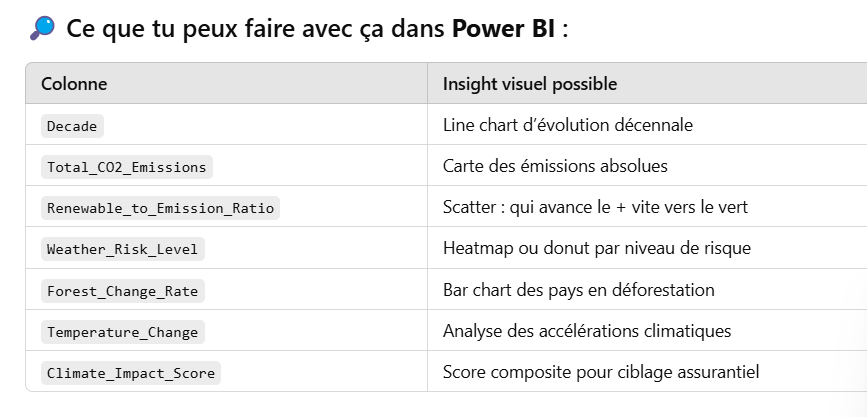

In [16]:
from IPython.display import Image, display

# Afficher une image PNG dans le notebook
image_path = "utilite.png"
display(Image(filename=image_path))


#### Matrice de corrélation

C:\Users\carol\AppData\Local\Temp\ipykernel_32476\4180893221.py:25: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\carol\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


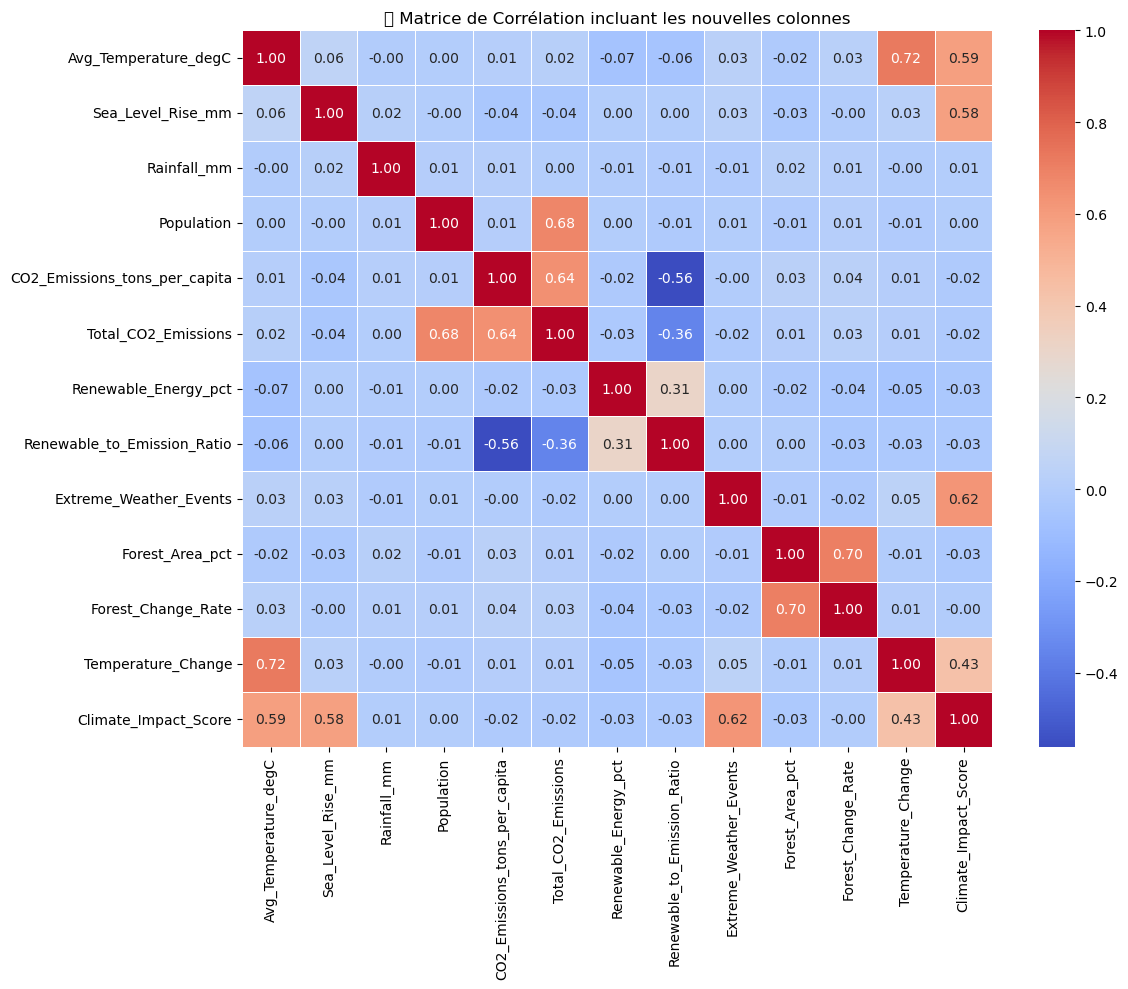

In [19]:
# Sélection des colonnes numériques incluant les nouvelles features
correlation_columns = [
    "Avg_Temperature_degC",
    "Sea_Level_Rise_mm",
    "Rainfall_mm",
    "Population",
    "CO2_Emissions_tons_per_capita",
    "Total_CO2_Emissions",
    "Renewable_Energy_pct",
    "Renewable_to_Emission_Ratio",
    "Extreme_Weather_Events",
    "Forest_Area_pct",
    "Forest_Change_Rate",
    "Temperature_Change",
    "Climate_Impact_Score"
]

# Matrice de corrélation
corr_matrix = df[correlation_columns].corr()

# Heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("🔍 Matrice de Corrélation incluant les nouvelles colonnes")
plt.tight_layout()
plt.show()

--> Corrélations entre : total emission CO2 + population, etc 

In [ ]:
# 🗂️ Sauvegarder le fichier nettoyé
df.to_csv("Environmental_Data_Cleaned.csv", index=False)
print("\n✅ Données nettoyées et sauvegardées dans 'Environmental_Data_Cleaned.csv'")